In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
import time
import numpy as np
import tensorflow as tf
#from tensorflow.keras import mixed_precision
# import matplotlib.pyplot as plt

print(tf.__version__)

# mixed_precision.set_global_policy('mixed_float16')

2.4.1


In [4]:
import os 

project_folder = "/content/gdrive/MyDrive/EDR/DeepLabv3/predAE/"

if os.path.isdir(project_folder) == False:
    os.mkdir(project_folder)

os.chdir(project_folder)

In [5]:
# To start training of the generator from scratch
%run -i reset_and_train_gen.py

Discriminator output shape: (None,32,64,1)
--- We train the generator alone for 10 epochs
epoch 1, GEN_loss 1.1739070415496826
epoch 2, GEN_loss 1.1738935708999634
epoch 3, GEN_loss 1.1738799810409546
epoch 4, GEN_loss 1.1738665103912354
epoch 5, GEN_loss 1.1738531589508057
epoch 6, GEN_loss 1.173839807510376
epoch 7, GEN_loss 1.1738262176513672
epoch 8, GEN_loss 1.1738128662109375
epoch 9, GEN_loss 1.1737993955612183
epoch 10, GEN_loss 1.173785924911499


In [7]:
# To continue training of the generator from a saved h5
%run -i train_gen.py

--- We train the generator alone for 2 epochs
epoch 1, GEN_loss 1.1752015352249146
epoch 2, GEN_loss 1.1751879453659058


In [6]:
# To start training of the discriminator from scratch (using the previous generator in h5)
%run -i reset_and_train_dis.py

--- We train the discriminator alone for 2 epochs
epoch 1, DIS_loss 1.367390751838684
epoch 2, DIS_loss 1.3624238967895508


In [9]:
# To continue training of the discriminator from a saved h5
%run -i train_dis.py

--- We train the discriminator alone for 2 epochs
epoch 1, DIS_loss 1.3726765513420105
epoch 2, DIS_loss 1.3726765513420105


In [7]:
# After we have reasonable models for generator and discriminator, we trained the gan combined
%run -i train_gan.py

# WARNING: If we call reset_and_train_gan.py we will reset the weights of both gen and dis

--- We train the gan for 2 epochs
epoch 1, GAN_loss 0.0, DIS_loss 1.3566038608551025, GEN_loss -0.33915096521377563
epoch 2, GAN_loss 0.0, DIS_loss 1.3566038608551025, GEN_loss -0.33915096521377563


(3, 256, 512, 1)
(3, 256, 512, 1)


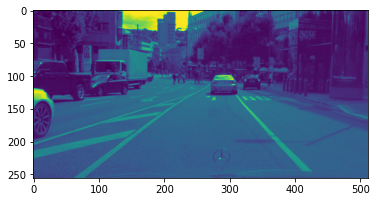

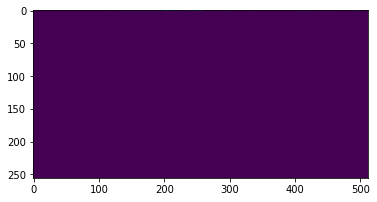

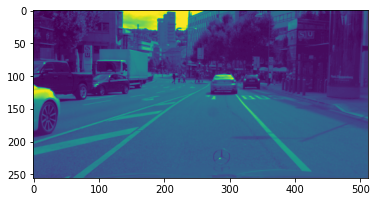

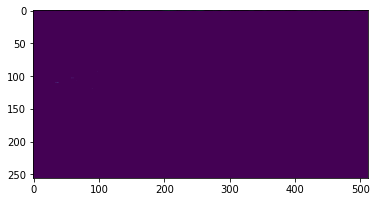

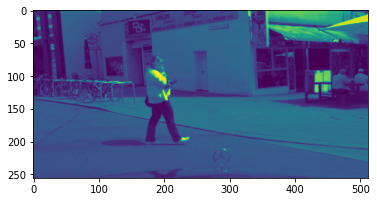

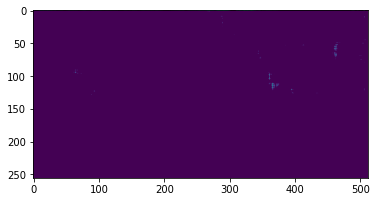

(1, 256, 512, 1)
(1, 256, 512, 1)


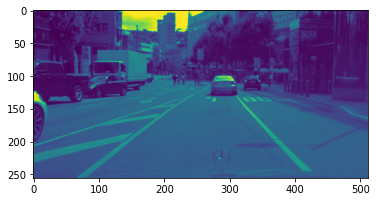

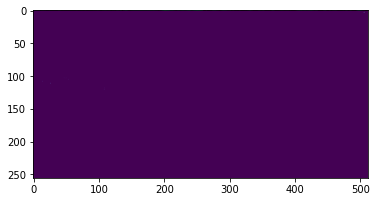

In [5]:
# We test the performance of the generator on the sequences in test_dirs
%run -i eval_gen.py

In [5]:
# We test the performance of the discriminator on the sequences in test_dirs
%run -i eval_dis.py

real 0.5147312
real 0.5152136
real 0.5151384
pred 0.5000251
pred 0.5000247
pred 0.50002456
real 0.51510394
pred 0.5000246
